<a href="https://colab.research.google.com/github/xtenix88/Data-Portfolio/blob/main/HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier 
import sklearn.metrics as metrics

**a) Use the Machine Learning algorithm: k-NN, to classify multiphase flow patterns, using the database BD12Experiments6FP.csv and evaluate the performance.**


In [11]:
df = pd.read_csv('/content/BD12Experiments6FP.csv')

In [12]:
df.head(5)

,Vsl,Vsg,VisL,VisG,DenL,DenG,ST,Ang,ID,FlowPattern
0,0.04482,0.81402,0.001,0.00007,1000.0,1.12,0.07,0.0,0.0254,3
1,0.06098,0.81402,0.001,0.00007,1000.0,1.12,0.07,0.0,0.0254,5
2,0.08811,0.81402,0.001,0.00007,1000.0,1.12,0.07,0.0,0.0254,5
3,0.06098,1.10366,0.001,0.00007,1000.0,1.12,0.07,0.0,0.0254,5
4,0.12195,1.10366,0.001,0.00007,1000.0,1.12,0.07,0.0,0.0254,5


In [13]:
df.describe()

,Vsl,Vsg,VisL,VisG,DenL,DenG,ST,Ang,ID,FlowPattern
count,9029.000000,9029.000000,9029.000000,9029.000000,9029.000000,9029.000000,9029.000000,9029.000000,9029.000000,9029.000000
mean,0.786837,5.894700,0.012334,0.000017,951.239041,4.136893,3.234937,3.609715,0.047157,4.052608
std,1.282596,10.415176,0.066958,0.000009,109.882425,8.681986,22.233329,38.746648,0.026143,1.365682
min,0.000240,0.003720,0.000010,0.000000,77.041600,0.125410,0.013400,-90.000000,0.008740,1.000000
25%,0.045640,0.173660,0.001000,0.000010,879.400000,1.800000,0.032000,-1.000000,0.025000,3.000000
50%,0.210810,1.581710,0.001000,0.000020,1000.000000,1.800000,0.070000,0.250000,0.051000,5.000000
75%,1.000000,7.469510,0.003220,0.000020,1000.000000,4.134000,0.070000,10.000000,0.051000,5.000000
max,25.517000,200.609760,0.601280,0.000070,1059.000000,102.500000,238.070000,90.000000,0.189000,7.000000


In [15]:
# Check the dataset's datatypes

df.dtypes

Vsl            float64
Vsg            float64
VisL           float64
VisG           float64
DenL           float64
DenG           float64
ST             float64
Ang            float64
ID             float64
FlowPattern      int64
dtype: object

In [14]:
# Check the dependent variable Y

df['FlowPattern'].value_counts()

5    4721
4    1664
3    1093
1     816
2     582
7     153
Name: FlowPattern, dtype: int64

In [16]:
# Check for null values

df.isna().sum() 

Vsl            0
Vsg            0
VisL           0
VisG           0
DenL           0
DenG           0
ST             0
Ang            0
ID             0
FlowPattern    0
dtype: int64

In [17]:
# Creating train and test data

X = df.drop(['FlowPattern'], axis=1)
y = df['FlowPattern']

In [51]:
print(X.shape)
print(y.shape)

(9029, 9)
(9029,)


In [20]:
# Split the data into train and test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
print('Training shape: ', X_train.shape)
print('Testing shape: ', X_test.shape)
print('Labels Training shape: ', y_train.shape)
print('Labels Testing shape: ', y_test.shape)

Training shape:  (7223, 9)
Testing shape:  (1806, 9)
Labels Training shape:  (7223,)
Labels Testing shape:  (1806,)


In [53]:
# Normalize the train and test data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [59]:
# Threshold for removing correlated variables with Pearson correlation coefficient being greater than 0.9.
threshold = 0.90

corr_matrix =pd.DataFrame(X_train).corr(method='pearson').abs()
print(corr_matrix)

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

print('There are %d columns to remove.' % (len(to_drop)))

          0         1         2  ...         6         7         8
0  1.000000  0.145095  0.045300  ...  0.049623  0.066122  0.008692
1  0.145095  1.000000  0.018105  ...  0.066771  0.046577  0.094406
2  0.045300  0.018105  1.000000  ...  0.023516  0.015674  0.020729
3  0.012258  0.371089  0.066292  ...  0.276755  0.000984  0.146110
4  0.139682  0.100330  0.111240  ...  0.061654  0.072656  0.064459
5  0.011374  0.091850  0.040774  ...  0.301817  0.198504  0.641328
6  0.049623  0.066771  0.023516  ...  1.000000  0.006428  0.313292
7  0.066122  0.046577  0.015674  ...  0.006428  1.000000  0.174677
8  0.008692  0.094406  0.020729  ...  0.313292  0.174677  1.000000

[9 rows x 9 columns]
There are 0 columns to remove.


In [76]:
# Using k = 5 as default

k = 5
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
y_pred = neigh.predict(X_test)
print("Accuracy of model at K=1 is",metrics.accuracy_score(y_test, y_pred))

Accuracy of model at K=1 is 0.8737541528239202


In [77]:
y_pred_df = pd.DataFrame(y_pred)
y_pred_df.value_counts()

5    925
4    341
3    211
1    166
2    122
7     41
dtype: int64

In [78]:
# Confusion Matrix for k=5

cm = confusion_matrix(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[141   0   3   0  17   0]
 [  0 104   1   2  19   0]
 [  2   7 166  21  16   0]
 [  0   2  24 292  20   0]
 [ 23   9  17  26 849  15]
 [  0   0   0   0   4  26]]
              precision    recall  f1-score   support

           1       0.85      0.88      0.86       161
           2       0.85      0.83      0.84       126
           3       0.79      0.78      0.78       212
           4       0.86      0.86      0.86       338
           5       0.92      0.90      0.91       939
           7       0.63      0.87      0.73        30

    accuracy                           0.87      1806
   macro avg       0.82      0.85      0.83      1806
weighted avg       0.88      0.87      0.87      1806



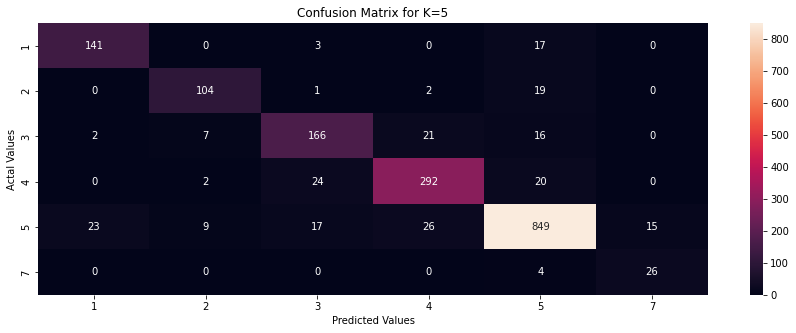

In [81]:
cm_df = pd.DataFrame(cm,
                     index = ['1','2','3','4','5','7'], 
                     columns = ['1','2','3','4','5','7'])

plt.figure(figsize=(15,5))
sns.heatmap(cm_df, annot=True, fmt='g')
plt.title('Confusion Matrix for K=5')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

**b) Apply parameters optimization to (a) and evaluate the 
performance.**

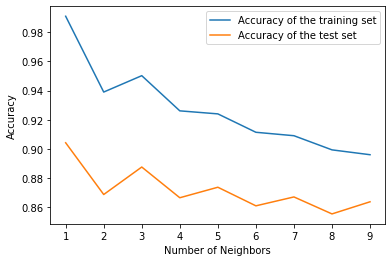

In [45]:
# Choosing K, given a range from k=1 to k=10

training_accuracy = []
test_accuracy = []

neighbors_setting = range(1,10)

for n_neighbors in neighbors_setting:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train,y_train)
    training_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))
 
plt.plot(neighbors_setting,training_accuracy, label='Accuracy of the training set')
plt.plot(neighbors_setting,test_accuracy, label='Accuracy of the test set')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')
plt.legend()

In [38]:
# k=1 yield the best accuracy

print("Accuracy of the training set for 1NN: {:3f}".format(training_accuracy[0]))
print("Accuracy of the test set for 1NN: {:3f}".format(test_accuracy[0]))

Accuracy of the training set for 1NN: 0.990863
Accuracy of the test set for 1NN: 0.904208


Text(0, 0.5, 'Accuracy')

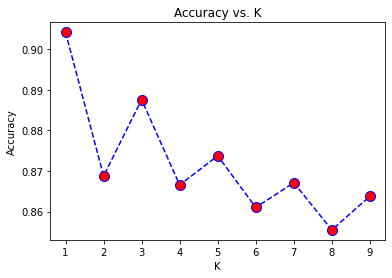

In [57]:
# Examine accuracy from k=1 to k=10

acc = []
for i in range(1,10):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.plot(range(1,10),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Accuracy vs. K')
plt.xlabel('K')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Error Rate')

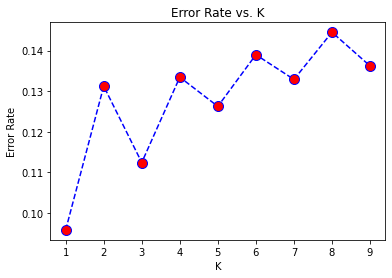

In [61]:
# Examine error rate from k=1 to k=10

error_rate = []
for i in range(1,10):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.plot(range(1,10),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [72]:
# Testing k=1 and print the model's accuracy score

k = 1
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
y_pred1 = neigh.predict(X_test)
print("Accuracy of model at K=1 is",metrics.accuracy_score(y_test, y_pred1))

Accuracy of model at K=1 is 0.9042081949058693


In [74]:

cm1 = confusion_matrix(y_test, y_pred1)

print(confusion_matrix(y_test, y_pred1))
print(classification_report(y_test, y_pred1))

[[147   0   0   0  14   0]
 [  0 116   1   0   9   0]
 [  0   4 182  11  15   0]
 [  0   2  21 298  17   0]
 [ 15   9  16  25 867   7]
 [  0   0   0   0   7  23]]
              precision    recall  f1-score   support

           1       0.91      0.91      0.91       161
           2       0.89      0.92      0.90       126
           3       0.83      0.86      0.84       212
           4       0.89      0.88      0.89       338
           5       0.93      0.92      0.93       939
           7       0.77      0.77      0.77        30

    accuracy                           0.90      1806
   macro avg       0.87      0.88      0.87      1806
weighted avg       0.90      0.90      0.90      1806



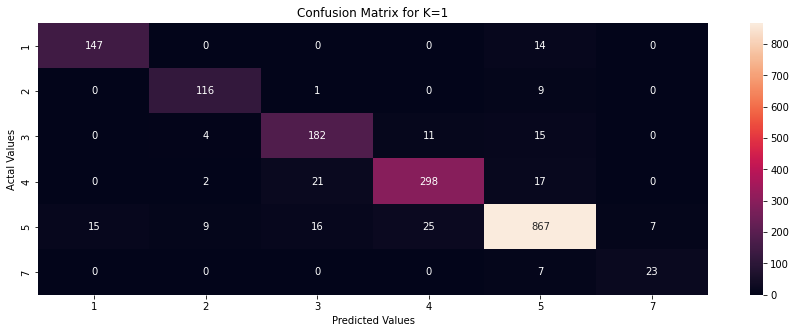

In [80]:
# Plotting the confusion matrix 

cm1_df = pd.DataFrame(cm1,
                     index = ['1','2','3','4','5','7'], 
                     columns = ['1','2','3','4','5','7'])

plt.figure(figsize=(15,5))
sns.heatmap(cm1_df, annot=True, fmt='g')
plt.title('Confusion Matrix for K=1')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

**c) Explain the Confusion Matrix obtained in (a) y (b), that is, before and after parameters optimization.**

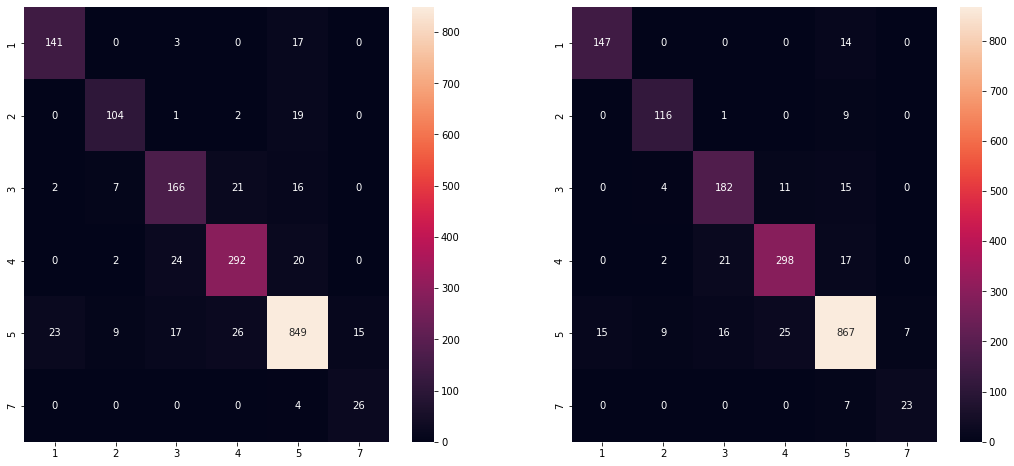

In [98]:
fig, ax =plt.subplots(1,2,figsize=(18,8))

sns.heatmap(cm_df, annot=True, fmt='g', ax=ax[0])
sns.heatmap(cm1_df, annot=True, fmt='g', ax=ax[1])

plt.show()

#Confusion Matrix Before/After Parameter Optimization Summary:

**The left confusion matrix is k=5 and the right confusion matrix is k=1. By parameter optimization from k=5 to k=1, we improved the model accuracy from 0.8737 to 0.9042. In the k=1 confusion matrix, the diagonal numbers 147,116,182,298 and 867 are the TRUE POSITIVES. For k=1 model, for the flow pattern 1, 14 pattern have been falsely identified as flow pattern 5. For the k=5 model, for the flow pattern 1, 3 patterns are falsely identified as flow pattern 3 and 17 patterns falsely identified as flow pattern 5. At this point, we can see that k=1 model predicted less falsely flow patterns than k=5 model. k=1 model also have more TRUE POSITIVES values.**